In [1]:
#Run time for all cells in notebook: 8 min

In [2]:
from functions import *
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [3]:
#Features
cols = ['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH', 'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F', 'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I', 'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH', 'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH', 'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V', 'R3-PA8:VH', 'R3-PM8:V', 'R3-PA9:VH', 'R3-PM9:V', 'R3-PA10:IH', 'R3-PM10:I', 'R3-PA11:IH', 'R3-PM11:I', 'R3-PA12:IH', 'R3-PM12:I', 'R3:F', 'R3:DF', 'R3-PA:Z', 'R3-PA:ZH', 'R3:S', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM4:I', 'R4-PA5:IH', 'R4-PM5:I', 'R4-PA6:IH', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PM7:V', 'R4-PA8:VH', 'R4-PM8:V', 'R4-PA9:VH', 'R4-PM9:V', 'R4-PA10:IH', 'R4-PM10:I', 'R4-PA11:IH', 'R4-PM11:I', 'R4-PA12:IH', 'R4-PM12:I', 'R4:F', 'R4:DF', 'R4-PA:Z', 'R4-PA:ZH', 'R4:S', 'control_panel_log1', 'control_panel_log2', 'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4']

#Importing data for classification using function from fomlads library
inputs, targets, input_cols, classes = import_for_classification('power_clean.csv', input_cols=cols, target_col='marker')

dataframe.columns = Index(['Unnamed: 0', 'R1-PA10:IH', 'R1-PA11:IH', 'R1-PA12:IH', 'R1-PA1:VH',
       'R1-PA2:VH', 'R1-PA3:VH', 'R1-PA4:IH', 'R1-PA5:IH', 'R1-PA6:IH',
       ...
       'id', 'marker', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log',
       'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4'],
      dtype='object', length=131)
input_cols = ['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH', 'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F', 'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH', 'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I

In [4]:
#Splitting the data into train and test sets using functions from fomlads library
N = inputs.shape[0]
train_filter, test_filter = train_and_test_filter(N, 0.1)
train_inputs, train_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_filter, test_filter)
train_inputs= np.float32(train_inputs)

In [5]:
#Selecting the svc model from SVM library in scikit learn
#Specifying hyperparameters derived from cross validation (separate file)
svc = SVC(C=10, verbose=0, gamma=0.0001)

In [6]:
#Fitting the model to training data
svc.fit(train_inputs, train_targets)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=0)

In [7]:
#Predicting targets using trained model on test data
pred_targets = svc.predict(test_inputs)
#Generating model F1 score
svm_f1 = f1_score(test_targets, pred_targets, average=None)
svm_f1_average = f1_score(test_targets, pred_targets, average='macro')

0.6959380758553511


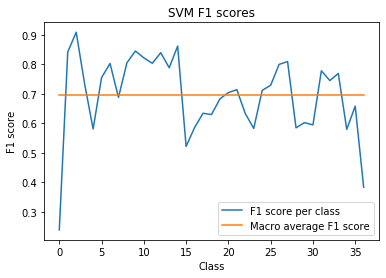

In [8]:
#Average score across classes
print(svm_f1_average)

#Performance across classes visualised
plt.figure()
plt.plot([i for i in range(37)], svm_f1, label='F1 score per class')
plt.plot([i for i in range(37)], [svm_f1_average for i in range(37)], label='Macro average F1 score')
plt.title("SVM F1 scores")
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.legend(loc = 'lower right')
plt.savefig('SVM_output.png')
plt.show()

In [9]:
#Selecting the LogisticRegression model from linear_model library in scikit learn
log_model = LogisticRegression(multi_class="multinomial", solver="sag", max_iter=5000)

In [10]:
#Fitting the model to training data
log_model.fit(train_inputs,train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Predicting targets using trained model on test data
log_pred_targets = log_model.predict(test_inputs)
#Generating model F1 score
log_f1 = f1_score(test_targets, log_pred_targets, average=None)
log_f1_average = f1_score(test_targets, log_pred_targets, average='macro')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.07159162175050271


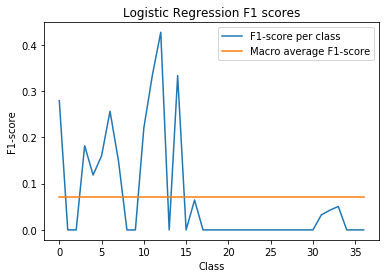

In [12]:
#Average score across classes
print(log_f1_average)

#Performance across classes visualised
plt.figure()
plt.plot([i for i in range(37)], log_f1, label='F1-score per class')
plt.plot([i for i in range(37)], [log_f1_average for i in range(37)], label='Macro average F1-score')
plt.title("Logistic Regression F1 scores")
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.legend(loc='upper right')
plt.show()

In [13]:
#Selecting the RandomForest model from ensemble library in scikit learn
rfc = RandomForestClassifier(n_estimators = 150, max_depth=15)

In [14]:
#Fitting the model to training data
rfc.fit(train_inputs,train_targets)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
#Predicting targets using trained model on test data
rfc_pred_targets = rfc.predict(test_inputs)
#Generating model F1 score
rfc_f1 = f1_score(test_targets, rfc_pred_targets, average=None)
rfc_f1_average = f1_score(test_targets, rfc_pred_targets, average='macro')

0.8769075083148181


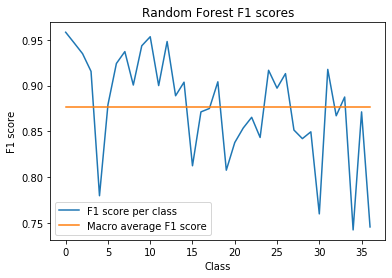

In [16]:
#Average score across classes
print(rfc_f1_average)

#Performance across classes visualised
plt.figure()
plt.plot([i for i in range(37)], rfc_f1, label='F1 score per class')
plt.plot([i for i in range(37)], [rfc_f1_average for i in range(37)], label='Macro average F1 score')
plt.title("Random Forest F1 scores")
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.legend(loc = 'lower left')
plt.show()

In [17]:
#Selecting the MLPClassifier model from neural_network library in scikit learn
mlp = MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500, activation='relu')

In [18]:
#Fitting the model to training data
mlp.fit(train_inputs,train_targets)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
#Predicting targets using trained model on test data
mlp_pred_targets = mlp.predict(test_inputs)
#Generating model F1 score
mlp_f1 = f1_score(test_targets, mlp_pred_targets, average=None)
mlp_f1_average = f1_score(test_targets, mlp_pred_targets, average='macro')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0027648584349615275


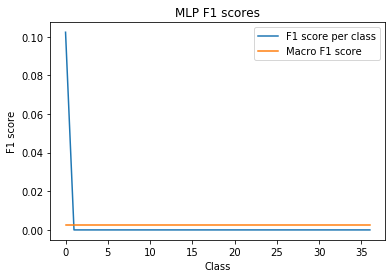

In [20]:
#Average score across classes
print(mlp_f1_average)

#Performance across classes visualised
plt.figure()
plt.plot([i for i in range(37)], mlp_f1, label='F1 score per class')
plt.plot([i for i in range(37)], [mlp_f1_average for i in range(37)], label='Macro F1 score')
plt.title("MLP F1 scores")
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.legend(loc='upper right')
plt.show()

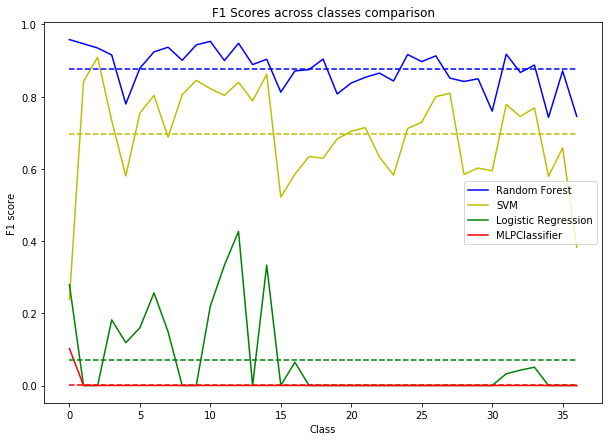

In [30]:
# data visualisation for the comparison

fig = plt.figure(figsize=(10,7))

#plots of averages across classes
plt.plot([i for i in range(37)], rfc_f1, label="Random Forest", color='b')
plt.plot([i for i in range(37)], svm_f1, label="SVM", color = 'y')
plt.plot([i for i in range(37)], log_f1, label="Logistic Regression", color='g')
plt.plot([i for i in range(37)], mlp_f1, label="MLPClassifier", color='r')

#plots of macro averages
plt.plot([i for i in range(37)], [rfc_f1_average for i in range(37)], 'b--')
plt.plot([i for i in range(37)], [svm_f1_average for i in range(37)], 'y--')
plt.plot([i for i in range(37)], [log_f1_average for i in range(37)], 'g--')
plt.plot([i for i in range(37)], [mlp_f1_average for i in range(37)], 'r--')

plt.title("F1 Scores across classes comparison")
plt.legend(loc='best')
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.show()
fig.savefig('f1_scores.png')

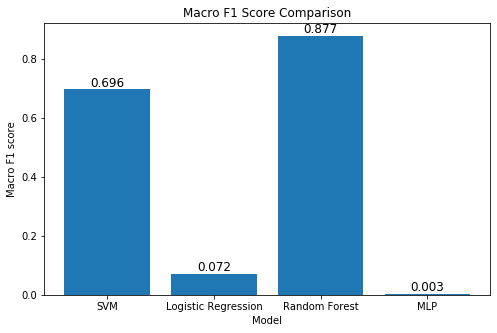

In [22]:
# data visualisation for the comparison

name = ["SVM", "Logistic Regression", "Random Forest", "MLP"]
avg = [svm_f1_average, log_f1_average, rfc_f1_average, mlp_f1_average]

plt.figure(figsize=(8,5))
plt.bar(name,avg)
plt.xlabel('Model')
plt.ylabel('Macro F1 score')
plt.title('Macro F1 Score Comparison')

for i in range(len(name)):
    val = "{:.3f}".format(avg[i])
    plt.text(name[i], avg[i], val, ha='center', va='bottom', size = 12)
     
plt.show()